# HW5
# By Rohan Mehta (mehtaro)

## Problem 1: Pattern-matching: The brute-force

### Problem 1.1: The brute-force pattern-matching algorithm [10 pt.]
Describe a text D and a pattern P such that the brute-force pattern-matching algorithm runs in Ω(dp) time.The lengths of D and P are d and p, respectively.

### Solution:
#### The worst case complexity for the Brute force algorithm is O(dp) where d is the length of the text and p is the   length of the pattern.
#### The worst case of a Brute force algorithm will be reached when the pattern to be matched is at the end of the text and all the characters except the last character of the pattern matches the text at every iteration.
   
#### For example, for the considered text 'cccccccccd' and pattern 'ccd',
    Comparsions made will be as follows:
    cccccccccd
    ccd
    Position 0, position 1 and position 2 are compared (3 separate comparisons). No match found for the position 2
    cccccccccd
    ccd
    Position 1, position 2 and position 3 are compared (3 separate comparisons). No match found for the position 3
    cccccccccd
    ccd
    Position 2, position 3 and position 4 are compared (3 separate comparisons). No match found for the position 4
    cccccccccd
    ccd
    Position 3, position 4 and position 5 are compared (3 separate comparisons). No match found for the position 5
    cccccccccd
    ccd
    Position 4, position 5 and position 6 are compared (3 separate comparisons). No match found for the position 6
    cccccccccd
    ccd
    Position 5, position 6 and position 7 are compared (3 separate comparisons). No match found for the position 7
    cccccccccd
    ccd
    Position 6, position 7 and position 8 are compared (3 separate comparisons). No match found for the position 8
    cccccccccd
    ccd
    Position 7, position 8 and position 9 are compared (3 separate comparisons). Match found
#### In this case, the outer loop runs for n-m+1 times and the inner loop runs for m times and all the other operations take constant time. Since the pattern is only matched at the end of the text, the time complexity is Ω(dp)

### Problem 1.2: Python’s str class and pattern-matching [20 pt]
In this part, you are asked to modify three pattern matching programs given to you (See ap- pendix). Run your modified programs for varying-length patterns and show your results.
The count method in Python’s str class takes a text D and a pattern P and returns the maximum number of non-overlapping occurrences of a P within D. As an example ‘cdcdcd- cdc’.count(‘cdc’) returns 2.
1. Modify the brute-force pattern-matching to return non-overlapping occurrences of a P within D.
2. Similar to the previous question (Problem 1.2.1), do the same on the Boyer-Moore pro- gram.
3. Similar to problem 1.2.1, modify the KMP program.


In [1]:
# Brute force

def find_brute_counter(T, P):
    n, m = len(T), len(P)
    # every starting position
    i = 0
    count = 0
    while i < (n-m+1):
        k = 0
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            count += 1
            i += m
        else:
            i += 1
    return count


In [2]:
# Boyer-Moore

def find_boyer_moore_counter(T, P):
    n, m = len(T), len(P)
    count = 0
    if m == 0: 
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            if k == 0:
                count += 1
                k = m - 1
                i += 2 * (m - 1) + 1
            else:
                i -= 1
                k -= 1
        # Not match, reset the positions
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return count


In [3]:
# KMP failure function

def compute_kmp_fail_counter(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else: 
            j += 1
    return fail

# KMP
def find_kmp_counter(T, P):
    count = 0
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail_counter(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                count += 1
                k = -1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return count

In [4]:
print("Count of Brute Force {}".format(find_brute_counter("dafadaf", "daf")))
print("Count of Boyer Moore {}".format(find_boyer_moore_counter("dafadaf", "daf")))
print("Count of KMP {}".format(find_kmp_counter("dafadaf", "daf")))

Count of Brute Force 2
Count of Boyer Moore 2
Count of KMP 2


## Problem 2: Experimental Analysis of Pattern-Matching Algorithms [20 pt.]
Perform an experimental analysis of pattern matching algorithms in terms of:

1. Number of character comparison: Perform an experimental analysis of the efficiency of the brute-force, the KMP and Boyer-Moore pattern matching algorithms for varying-length patterns.

In [5]:
# Brute force

def find_brute2(T, P):
    charsCompared = 0
    n, m = len(T), len(P)
    # every starting position
    for i in range(n-m+1):
        k = 0
        charsCompared += 1
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            print("Number of charater comparisons by brute force = {}".format(charsCompared))
            return i
            print("Number of charater comparisons by brute force = {}".format(charsCompared))
    return -1

In [6]:
# Boyer-Moore

def find_boyer_moore2(T, P):
    charsCompared = 0
    n, m = len(T), len(P)
    if m == 0: 
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        charsCompared += 1
        # If match, decrease i,k
        if T[i] == P[k]:
            if k == 0:
                print("Number of charater comparisons by boyer moore = {}".format(charsCompared))
                return i
            else:
                i -= 1
                k -= 1
        # Not match, reset the positions
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    print("Number of charater comparisons by boyer moore = {}".format(charsCompared))
    return -1

In [7]:
# KMP failure function
def compute_kmp_fail2(P):
  
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else: 
            j += 1
    return fail

# KMP
def find_kmp2(T, P):
    charsCompared = 0
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail2(P)
    # print(fail)
    j = 0 
    k = 0
    while j < n:
    
        if T[j] == P[k]:
            charsCompared += 1
            if k == m-1:
                print("Number of charater comparisons by KMP = {}".format(charsCompared))
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    print("Number of charater comparisons by KMP = {}".format(charsCompared))
    return kmp_count


In [8]:
# compare the three algorithms

def compare2(T, P):
    index = find_brute2(T, P)
    index = find_boyer_moore2(T, P)
    index = find_kmp2(T, P)

In [9]:
import random
import string
import time
import matplotlib.pyplot as plt

def generate_random_strings2(letters, size):
    return ''.join(random.choice(letters) for i in range(size))

# set random seed so you will always get the same random_string
random.seed(100)
# Play with letter_set
letter_set = string.ascii_letters

random_string = generate_random_strings2(letter_set, 10**5)

for i in range(10,100,10):
    print("When pattern size is {}".format(i))
    pattern = generate_random_strings2(string.ascii_letters ,i)
    test_string = random_string + pattern
    compare2(test_string, pattern)
    print("-------------------------------------------------------")

When pattern size is 10
Number of charater comparisons by brute force = 100001
Number of charater comparisons by boyer moore = 11205
Number of charater comparisons by KMP = 1953
-------------------------------------------------------
When pattern size is 20
Number of charater comparisons by brute force = 100001
Number of charater comparisons by boyer moore = 6133
Number of charater comparisons by KMP = 1961
-------------------------------------------------------
When pattern size is 30
Number of charater comparisons by brute force = 100001
Number of charater comparisons by boyer moore = 4719
Number of charater comparisons by KMP = 2057
-------------------------------------------------------
When pattern size is 40
Number of charater comparisons by brute force = 100001
Number of charater comparisons by boyer moore = 3807
Number of charater comparisons by KMP = 1991
-------------------------------------------------------
When pattern size is 50
Number of charater comparisons by brute for

2. Relative speed comparison: Perform an experimental comparison of the brute-force, KMP, and Boyer-Moore pattern-matching algorithms. Run each algorithm against large text doc- uments using varying-length patterns and report the relative running times.

In [10]:
# Brute force

def find_brute(T, P):
    n, m = len(T), len(P)
    # every starting position
    for i in range(n-m+1):
        k = 0
        # conduct O(k) comparisons
        while k < m and T[i+k] == P[k]:
            k += 1
        if k == m:
            return i
    return -1

In [11]:
# Boyer-Moore

def find_boyer_moore(T, P):
    n, m = len(T), len(P)
    if m == 0: 
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m-1
    k = m-1
    while i < n:
        # If match, decrease i,k
        if T[i] == P[k]:
            if k == 0:
                return i
            else:
                i -= 1
                k -= 1
        # Not match, reset the positions
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j+1)
            k = m-1
    return -1

In [12]:
# KMP failure function

def compute_kmp_fail(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    while j < m:
        if P[j] == P[k]:
            fail[j] = k+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else: 
            j += 1
    return fail

# KMP
def find_kmp(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail = compute_kmp_fail(P)
    # print(fail)
    j = 0
    k = 0
    while j < n:
        if T[j] == P[k]:
            if k == m-1:
                return j-m+1
            j += 1
            k += 1
        elif k > 0:
            k = fail[k-1]
        else:
            j += 1
    return -1

In [13]:
brute_force_time = []
boyer_moore_time = []
kmp_time = []
# compare the three algorithms
def compare(T, P):
    startTime = time.time()
    index = find_brute(T, P)
    endTime = time.time()
    print("Brute force takes {:f}s to run and returns {:d}".format(endTime-startTime, index))
    brute_force_time.append(endTime-startTime)

    startTime = time.time()
    index = find_boyer_moore(T, P)
    endTime = time.time()
    print("Boyer More takes {:f}s to run and returns {:d}".format(endTime-startTime, index))
    boyer_moore_time.append(endTime-startTime)

    startTime = time.time()
    index = find_kmp(T, P)
    endTime = time.time()
    print("KMP takes {:f}s to run and returns {:d}".format(endTime-startTime, index))
    kmp_time.append(endTime-startTime)

def generate_random_strings(letters, size):
    return ''.join(random.choice(letters) for i in range(size))

In [14]:
# set random seed so you will always get the same random_string
random.seed(100)
# Play with letter_set
letter_set = string.ascii_letters

random_string = generate_random_strings(letter_set, 10**5)
n = []

for i in range(10,10000,10):
    n.append(i)
    print("When pattern size is {}".format(i))
    pattern = generate_random_strings(string.ascii_letters ,i)
    test_string = random_string + pattern
    compare(test_string, pattern)
    print("-------------------------------------------------------")



When pattern size is 10
Brute force takes 0.014868s to run and returns 100000
Boyer More takes 0.004201s to run and returns 100000
KMP takes 0.012764s to run and returns 100000
-------------------------------------------------------
When pattern size is 20
Brute force takes 0.014033s to run and returns 100000
Boyer More takes 0.002244s to run and returns 100000
KMP takes 0.012670s to run and returns 100000
-------------------------------------------------------
When pattern size is 30
Brute force takes 0.014070s to run and returns 100000
Boyer More takes 0.001726s to run and returns 100000
KMP takes 0.012827s to run and returns 100000
-------------------------------------------------------
When pattern size is 40
Brute force takes 0.014056s to run and returns 100000
Boyer More takes 0.001381s to run and returns 100000
KMP takes 0.012710s to run and returns 100000
-------------------------------------------------------
When pattern size is 50
Brute force takes 0.013970s to run and retur

Brute force takes 0.014330s to run and returns 100000
Boyer More takes 0.000785s to run and returns 100000
KMP takes 0.013018s to run and returns 100000
-------------------------------------------------------
When pattern size is 400
Brute force takes 0.014883s to run and returns 100000
Boyer More takes 0.000845s to run and returns 100000
KMP takes 0.012881s to run and returns 100000
-------------------------------------------------------
When pattern size is 410
Brute force takes 0.014590s to run and returns 100000
Boyer More takes 0.000687s to run and returns 100000
KMP takes 0.012921s to run and returns 100000
-------------------------------------------------------
When pattern size is 420
Brute force takes 0.014153s to run and returns 100000
Boyer More takes 0.000780s to run and returns 100000
KMP takes 0.012871s to run and returns 100000
-------------------------------------------------------
When pattern size is 430
Brute force takes 0.014195s to run and returns 100000
Boyer More

KMP takes 0.013239s to run and returns 100000
-------------------------------------------------------
When pattern size is 770
Brute force takes 0.014169s to run and returns 100000
Boyer More takes 0.000903s to run and returns 100000
KMP takes 0.013689s to run and returns 100000
-------------------------------------------------------
When pattern size is 780
Brute force takes 0.014664s to run and returns 100000
Boyer More takes 0.000982s to run and returns 100000
KMP takes 0.013087s to run and returns 100000
-------------------------------------------------------
When pattern size is 790
Brute force takes 0.014590s to run and returns 100000
Boyer More takes 0.000955s to run and returns 100000
KMP takes 0.013939s to run and returns 100000
-------------------------------------------------------
When pattern size is 800
Brute force takes 0.015002s to run and returns 100000
Boyer More takes 0.001189s to run and returns 100000
KMP takes 0.013713s to run and returns 100000
------------------

KMP takes 0.013173s to run and returns 100000
-------------------------------------------------------
When pattern size is 1140
Brute force takes 0.014240s to run and returns 100000
Boyer More takes 0.001115s to run and returns 100000
KMP takes 0.013376s to run and returns 100000
-------------------------------------------------------
When pattern size is 1150
Brute force takes 0.014384s to run and returns 100000
Boyer More takes 0.001100s to run and returns 100000
KMP takes 0.013374s to run and returns 100000
-------------------------------------------------------
When pattern size is 1160
Brute force takes 0.014216s to run and returns 100000
Boyer More takes 0.001182s to run and returns 100000
KMP takes 0.013651s to run and returns 100000
-------------------------------------------------------
When pattern size is 1170
Brute force takes 0.014287s to run and returns 100000
Boyer More takes 0.001127s to run and returns 100000
KMP takes 0.013191s to run and returns 100000
--------------

KMP takes 0.013937s to run and returns 100000
-------------------------------------------------------
When pattern size is 1510
Brute force takes 0.014075s to run and returns 100000
Boyer More takes 0.001106s to run and returns 100000
KMP takes 0.013455s to run and returns 100000
-------------------------------------------------------
When pattern size is 1520
Brute force takes 0.014633s to run and returns 100000
Boyer More takes 0.001082s to run and returns 100000
KMP takes 0.013481s to run and returns 100000
-------------------------------------------------------
When pattern size is 1530
Brute force takes 0.014430s to run and returns 100000
Boyer More takes 0.001144s to run and returns 100000
KMP takes 0.013874s to run and returns 100000
-------------------------------------------------------
When pattern size is 1540
Brute force takes 0.014397s to run and returns 100000
Boyer More takes 0.001143s to run and returns 100000
KMP takes 0.013313s to run and returns 100000
--------------

KMP takes 0.013690s to run and returns 100000
-------------------------------------------------------
When pattern size is 1870
Brute force takes 0.015472s to run and returns 100000
Boyer More takes 0.001477s to run and returns 100000
KMP takes 0.013389s to run and returns 100000
-------------------------------------------------------
When pattern size is 1880
Brute force takes 0.015195s to run and returns 100000
Boyer More takes 0.001120s to run and returns 100000
KMP takes 0.013880s to run and returns 100000
-------------------------------------------------------
When pattern size is 1890
Brute force takes 0.015474s to run and returns 100000
Boyer More takes 0.001182s to run and returns 100000
KMP takes 0.013741s to run and returns 100000
-------------------------------------------------------
When pattern size is 1900
Brute force takes 0.014810s to run and returns 100000
Boyer More takes 0.001271s to run and returns 100000
KMP takes 0.013735s to run and returns 100000
--------------

KMP takes 0.014221s to run and returns 100000
-------------------------------------------------------
When pattern size is 2230
Brute force takes 0.015079s to run and returns 100000
Boyer More takes 0.001135s to run and returns 100000
KMP takes 0.013644s to run and returns 100000
-------------------------------------------------------
When pattern size is 2240
Brute force takes 0.015643s to run and returns 100000
Boyer More takes 0.001307s to run and returns 100000
KMP takes 0.014039s to run and returns 100000
-------------------------------------------------------
When pattern size is 2250
Brute force takes 0.014796s to run and returns 100000
Boyer More takes 0.001321s to run and returns 100000
KMP takes 0.014301s to run and returns 100000
-------------------------------------------------------
When pattern size is 2260
Brute force takes 0.014747s to run and returns 100000
Boyer More takes 0.001249s to run and returns 100000
KMP takes 0.013898s to run and returns 100000
--------------

KMP takes 0.015267s to run and returns 100000
-------------------------------------------------------
When pattern size is 2590
Brute force takes 0.015890s to run and returns 100000
Boyer More takes 0.001710s to run and returns 100000
KMP takes 0.014754s to run and returns 100000
-------------------------------------------------------
When pattern size is 2600
Brute force takes 0.015978s to run and returns 100000
Boyer More takes 0.001562s to run and returns 100000
KMP takes 0.013731s to run and returns 100000
-------------------------------------------------------
When pattern size is 2610
Brute force takes 0.014299s to run and returns 100000
Boyer More takes 0.001243s to run and returns 100000
KMP takes 0.013544s to run and returns 100000
-------------------------------------------------------
When pattern size is 2620
Brute force takes 0.014599s to run and returns 100000
Boyer More takes 0.001292s to run and returns 100000
KMP takes 0.013468s to run and returns 100000
--------------

KMP takes 0.014148s to run and returns 100000
-------------------------------------------------------
When pattern size is 2940
Brute force takes 0.015436s to run and returns 100000
Boyer More takes 0.001476s to run and returns 100000
KMP takes 0.014227s to run and returns 100000
-------------------------------------------------------
When pattern size is 2950
Brute force takes 0.015302s to run and returns 100000
Boyer More takes 0.001572s to run and returns 100000
KMP takes 0.014728s to run and returns 100000
-------------------------------------------------------
When pattern size is 2960
Brute force takes 0.015160s to run and returns 100000
Boyer More takes 0.001489s to run and returns 100000
KMP takes 0.014177s to run and returns 100000
-------------------------------------------------------
When pattern size is 2970
Brute force takes 0.015053s to run and returns 100000
Boyer More takes 0.001565s to run and returns 100000
KMP takes 0.014264s to run and returns 100000
--------------

Brute force takes 0.015431s to run and returns 100000
Boyer More takes 0.001618s to run and returns 100000
KMP takes 0.014854s to run and returns 100000
-------------------------------------------------------
When pattern size is 3300
Brute force takes 0.015627s to run and returns 100000
Boyer More takes 0.001498s to run and returns 100000
KMP takes 0.014380s to run and returns 100000
-------------------------------------------------------
When pattern size is 3310
Brute force takes 0.015191s to run and returns 100000
Boyer More takes 0.001519s to run and returns 100000
KMP takes 0.014114s to run and returns 100000
-------------------------------------------------------
When pattern size is 3320
Brute force takes 0.015692s to run and returns 100000
Boyer More takes 0.001455s to run and returns 100000
KMP takes 0.014148s to run and returns 100000
-------------------------------------------------------
When pattern size is 3330
Brute force takes 0.015620s to run and returns 100000
Boyer 

Brute force takes 0.016361s to run and returns 100000
Boyer More takes 0.001760s to run and returns 100000
KMP takes 0.015240s to run and returns 100000
-------------------------------------------------------
When pattern size is 3650
Brute force takes 0.016227s to run and returns 100000
Boyer More takes 0.001658s to run and returns 100000
KMP takes 0.014449s to run and returns 100000
-------------------------------------------------------
When pattern size is 3660
Brute force takes 0.015568s to run and returns 100000
Boyer More takes 0.001489s to run and returns 100000
KMP takes 0.014854s to run and returns 100000
-------------------------------------------------------
When pattern size is 3670
Brute force takes 0.016044s to run and returns 100000
Boyer More takes 0.001577s to run and returns 100000
KMP takes 0.015525s to run and returns 100000
-------------------------------------------------------
When pattern size is 3680
Brute force takes 0.015370s to run and returns 100000
Boyer 

Brute force takes 0.015095s to run and returns 100000
Boyer More takes 0.001611s to run and returns 100000
KMP takes 0.014036s to run and returns 100000
-------------------------------------------------------
When pattern size is 4000
Brute force takes 0.015101s to run and returns 100000
Boyer More takes 0.001765s to run and returns 100000
KMP takes 0.014407s to run and returns 100000
-------------------------------------------------------
When pattern size is 4010
Brute force takes 0.015275s to run and returns 100000
Boyer More takes 0.001532s to run and returns 100000
KMP takes 0.015163s to run and returns 100000
-------------------------------------------------------
When pattern size is 4020
Brute force takes 0.014698s to run and returns 100000
Boyer More takes 0.001863s to run and returns 100000
KMP takes 0.013946s to run and returns 100000
-------------------------------------------------------
When pattern size is 4030
Brute force takes 0.014558s to run and returns 100000
Boyer 

KMP takes 0.014748s to run and returns 100000
-------------------------------------------------------
When pattern size is 4410
Brute force takes 0.015061s to run and returns 100000
Boyer More takes 0.001585s to run and returns 100000
KMP takes 0.014513s to run and returns 100000
-------------------------------------------------------
When pattern size is 4420
Brute force takes 0.015920s to run and returns 100000
Boyer More takes 0.001641s to run and returns 100000
KMP takes 0.014184s to run and returns 100000
-------------------------------------------------------
When pattern size is 4430
Brute force takes 0.014586s to run and returns 100000
Boyer More takes 0.001702s to run and returns 100000
KMP takes 0.015267s to run and returns 100000
-------------------------------------------------------
When pattern size is 4440
Brute force takes 0.016019s to run and returns 100000
Boyer More takes 0.001717s to run and returns 100000
KMP takes 0.015239s to run and returns 100000
--------------

KMP takes 0.015905s to run and returns 100000
-------------------------------------------------------
When pattern size is 4760
Brute force takes 0.015889s to run and returns 100000
Boyer More takes 0.001937s to run and returns 100000
KMP takes 0.015280s to run and returns 100000
-------------------------------------------------------
When pattern size is 4770
Brute force takes 0.015676s to run and returns 100000
Boyer More takes 0.001852s to run and returns 100000
KMP takes 0.014488s to run and returns 100000
-------------------------------------------------------
When pattern size is 4780
Brute force takes 0.015268s to run and returns 100000
Boyer More takes 0.001695s to run and returns 100000
KMP takes 0.014442s to run and returns 100000
-------------------------------------------------------
When pattern size is 4790
Brute force takes 0.014740s to run and returns 100000
Boyer More takes 0.001742s to run and returns 100000
KMP takes 0.014399s to run and returns 100000
--------------

KMP takes 0.015811s to run and returns 100000
-------------------------------------------------------
When pattern size is 5170
Brute force takes 0.015461s to run and returns 100000
Boyer More takes 0.001820s to run and returns 100000
KMP takes 0.014524s to run and returns 100000
-------------------------------------------------------
When pattern size is 5180
Brute force takes 0.015532s to run and returns 100000
Boyer More takes 0.001732s to run and returns 100000
KMP takes 0.015059s to run and returns 100000
-------------------------------------------------------
When pattern size is 5190
Brute force takes 0.016069s to run and returns 100000
Boyer More takes 0.002071s to run and returns 100000
KMP takes 0.014599s to run and returns 100000
-------------------------------------------------------
When pattern size is 5200
Brute force takes 0.015136s to run and returns 100000
Boyer More takes 0.001818s to run and returns 100000
KMP takes 0.014269s to run and returns 100000
--------------

KMP takes 0.015780s to run and returns 100000
-------------------------------------------------------
When pattern size is 5560
Brute force takes 0.014955s to run and returns 100000
Boyer More takes 0.002127s to run and returns 100000
KMP takes 0.014695s to run and returns 100000
-------------------------------------------------------
When pattern size is 5570
Brute force takes 0.014736s to run and returns 100000
Boyer More takes 0.001887s to run and returns 100000
KMP takes 0.014570s to run and returns 100000
-------------------------------------------------------
When pattern size is 5580
Brute force takes 0.015261s to run and returns 100000
Boyer More takes 0.001908s to run and returns 100000
KMP takes 0.015648s to run and returns 100000
-------------------------------------------------------
When pattern size is 5590
Brute force takes 0.014846s to run and returns 100000
Boyer More takes 0.001948s to run and returns 100000
KMP takes 0.014454s to run and returns 100000
--------------

KMP takes 0.015225s to run and returns 100000
-------------------------------------------------------
When pattern size is 5950
Brute force takes 0.015196s to run and returns 100000
Boyer More takes 0.002019s to run and returns 100000
KMP takes 0.015226s to run and returns 100000
-------------------------------------------------------
When pattern size is 5960
Brute force takes 0.016617s to run and returns 100000
Boyer More takes 0.002381s to run and returns 100000
KMP takes 0.016605s to run and returns 100000
-------------------------------------------------------
When pattern size is 5970
Brute force takes 0.016109s to run and returns 100000
Boyer More takes 0.002272s to run and returns 100000
KMP takes 0.015334s to run and returns 100000
-------------------------------------------------------
When pattern size is 5980
Brute force takes 0.014816s to run and returns 100000
Boyer More takes 0.002080s to run and returns 100000
KMP takes 0.014601s to run and returns 100000
--------------

KMP takes 0.016404s to run and returns 100000
-------------------------------------------------------
When pattern size is 6330
Brute force takes 0.015751s to run and returns 100000
Boyer More takes 0.002031s to run and returns 100000
KMP takes 0.014481s to run and returns 100000
-------------------------------------------------------
When pattern size is 6340
Brute force takes 0.015111s to run and returns 100000
Boyer More takes 0.002056s to run and returns 100000
KMP takes 0.014687s to run and returns 100000
-------------------------------------------------------
When pattern size is 6350
Brute force takes 0.014899s to run and returns 100000
Boyer More takes 0.002071s to run and returns 100000
KMP takes 0.014583s to run and returns 100000
-------------------------------------------------------
When pattern size is 6360
Brute force takes 0.014837s to run and returns 100000
Boyer More takes 0.002136s to run and returns 100000
KMP takes 0.014880s to run and returns 100000
--------------

KMP takes 0.016157s to run and returns 100000
-------------------------------------------------------
When pattern size is 6720
Brute force takes 0.015264s to run and returns 100000
Boyer More takes 0.002205s to run and returns 100000
KMP takes 0.015895s to run and returns 100000
-------------------------------------------------------
When pattern size is 6730
Brute force takes 0.016261s to run and returns 100000
Boyer More takes 0.002175s to run and returns 100000
KMP takes 0.015464s to run and returns 100000
-------------------------------------------------------
When pattern size is 6740
Brute force takes 0.014906s to run and returns 100000
Boyer More takes 0.002149s to run and returns 100000
KMP takes 0.014798s to run and returns 100000
-------------------------------------------------------
When pattern size is 6750
Brute force takes 0.015171s to run and returns 100000
Boyer More takes 0.002214s to run and returns 100000
KMP takes 0.014670s to run and returns 100000
--------------

KMP takes 0.014950s to run and returns 100000
-------------------------------------------------------
When pattern size is 7090
Brute force takes 0.016077s to run and returns 100000
Boyer More takes 0.002313s to run and returns 100000
KMP takes 0.014913s to run and returns 100000
-------------------------------------------------------
When pattern size is 7100
Brute force takes 0.016086s to run and returns 100000
Boyer More takes 0.002566s to run and returns 100000
KMP takes 0.016545s to run and returns 100000
-------------------------------------------------------
When pattern size is 7110
Brute force takes 0.017158s to run and returns 100000
Boyer More takes 0.002760s to run and returns 100000
KMP takes 0.017112s to run and returns 100000
-------------------------------------------------------
When pattern size is 7120
Brute force takes 0.017361s to run and returns 100000
Boyer More takes 0.002889s to run and returns 100000
KMP takes 0.017091s to run and returns 100000
--------------

KMP takes 0.016389s to run and returns 100000
-------------------------------------------------------
When pattern size is 7460
Brute force takes 0.016418s to run and returns 100000
Boyer More takes 0.002590s to run and returns 100000
KMP takes 0.016300s to run and returns 100000
-------------------------------------------------------
When pattern size is 7470
Brute force takes 0.015675s to run and returns 100000
Boyer More takes 0.002483s to run and returns 100000
KMP takes 0.015081s to run and returns 100000
-------------------------------------------------------
When pattern size is 7480
Brute force takes 0.015018s to run and returns 100000
Boyer More takes 0.002189s to run and returns 100000
KMP takes 0.015012s to run and returns 100000
-------------------------------------------------------
When pattern size is 7490
Brute force takes 0.015133s to run and returns 100000
Boyer More takes 0.002345s to run and returns 100000
KMP takes 0.016226s to run and returns 100000
--------------

Brute force takes 0.016759s to run and returns 100000
Boyer More takes 0.002592s to run and returns 100000
KMP takes 0.016985s to run and returns 100000
-------------------------------------------------------
When pattern size is 7840
Brute force takes 0.016111s to run and returns 100000
Boyer More takes 0.002464s to run and returns 100000
KMP takes 0.016552s to run and returns 100000
-------------------------------------------------------
When pattern size is 7850
Brute force takes 0.015852s to run and returns 100000
Boyer More takes 0.002367s to run and returns 100000
KMP takes 0.015375s to run and returns 100000
-------------------------------------------------------
When pattern size is 7860
Brute force takes 0.015192s to run and returns 100000
Boyer More takes 0.002403s to run and returns 100000
KMP takes 0.015031s to run and returns 100000
-------------------------------------------------------
When pattern size is 7870
Brute force takes 0.015051s to run and returns 100000
Boyer 

Brute force takes 0.016087s to run and returns 100000
Boyer More takes 0.002751s to run and returns 100000
KMP takes 0.017284s to run and returns 100000
-------------------------------------------------------
When pattern size is 8210
Brute force takes 0.015239s to run and returns 100000
Boyer More takes 0.002369s to run and returns 100000
KMP takes 0.015695s to run and returns 100000
-------------------------------------------------------
When pattern size is 8220
Brute force takes 0.015802s to run and returns 100000
Boyer More takes 0.002503s to run and returns 100000
KMP takes 0.015184s to run and returns 100000
-------------------------------------------------------
When pattern size is 8230
Brute force takes 0.015191s to run and returns 100000
Boyer More takes 0.002482s to run and returns 100000
KMP takes 0.016152s to run and returns 100000
-------------------------------------------------------
When pattern size is 8240
Brute force takes 0.016197s to run and returns 100000
Boyer 

KMP takes 0.015505s to run and returns 100000
-------------------------------------------------------
When pattern size is 8560
Brute force takes 0.014962s to run and returns 100000
Boyer More takes 0.002486s to run and returns 100000
KMP takes 0.015170s to run and returns 100000
-------------------------------------------------------
When pattern size is 8570
Brute force takes 0.016005s to run and returns 100000
Boyer More takes 0.002538s to run and returns 100000
KMP takes 0.015921s to run and returns 100000
-------------------------------------------------------
When pattern size is 8580
Brute force takes 0.015886s to run and returns 100000
Boyer More takes 0.002543s to run and returns 100000
KMP takes 0.015884s to run and returns 100000
-------------------------------------------------------
When pattern size is 8590
Brute force takes 0.015887s to run and returns 100000
Boyer More takes 0.002633s to run and returns 100000
KMP takes 0.016397s to run and returns 100000
--------------

KMP takes 0.016591s to run and returns 100000
-------------------------------------------------------
When pattern size is 8960
Brute force takes 0.016120s to run and returns 100000
Boyer More takes 0.002873s to run and returns 100000
KMP takes 0.017494s to run and returns 100000
-------------------------------------------------------
When pattern size is 8970
Brute force takes 0.017300s to run and returns 100000
Boyer More takes 0.003199s to run and returns 100000
KMP takes 0.016687s to run and returns 100000
-------------------------------------------------------
When pattern size is 8980
Brute force takes 0.016718s to run and returns 100000
Boyer More takes 0.002945s to run and returns 100000
KMP takes 0.016543s to run and returns 100000
-------------------------------------------------------
When pattern size is 8990
Brute force takes 0.016019s to run and returns 100000
Boyer More takes 0.002836s to run and returns 100000
KMP takes 0.016118s to run and returns 100000
--------------

Brute force takes 0.016001s to run and returns 100000
Boyer More takes 0.003084s to run and returns 100000
KMP takes 0.015567s to run and returns 100000
-------------------------------------------------------
When pattern size is 9360
Brute force takes 0.016676s to run and returns 100000
Boyer More takes 0.003123s to run and returns 100000
KMP takes 0.017900s to run and returns 100000
-------------------------------------------------------
When pattern size is 9370
Brute force takes 0.016019s to run and returns 100000
Boyer More takes 0.002839s to run and returns 100000
KMP takes 0.016827s to run and returns 100000
-------------------------------------------------------
When pattern size is 9380
Brute force takes 0.016553s to run and returns 100000
Boyer More takes 0.003186s to run and returns 100000
KMP takes 0.016114s to run and returns 100000
-------------------------------------------------------
When pattern size is 9390
Brute force takes 0.017048s to run and returns 100000
Boyer 

Brute force takes 0.017158s to run and returns 100000
Boyer More takes 0.002943s to run and returns 100000
KMP takes 0.017135s to run and returns 100000
-------------------------------------------------------
When pattern size is 9710
Brute force takes 0.017372s to run and returns 100000
Boyer More takes 0.003072s to run and returns 100000
KMP takes 0.017465s to run and returns 100000
-------------------------------------------------------
When pattern size is 9720
Brute force takes 0.016972s to run and returns 100000
Boyer More takes 0.002955s to run and returns 100000
KMP takes 0.017661s to run and returns 100000
-------------------------------------------------------
When pattern size is 9730
Brute force takes 0.016903s to run and returns 100000
Boyer More takes 0.003294s to run and returns 100000
KMP takes 0.016881s to run and returns 100000
-------------------------------------------------------
When pattern size is 9740
Brute force takes 0.016622s to run and returns 100000
Boyer 

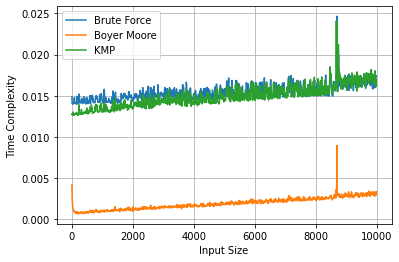

In [15]:
plt.xlabel('Input Size')
plt.ylabel('Time Complexity')
plt.plot(n, brute_force_time, label ='Brute Force')
plt.plot(n, boyer_moore_time, label ='Boyer Moore')
plt.plot(n, kmp_time, label ='KMP')
plt.grid()
plt.legend()
plt.show()

# For counting number of comparisons

In [ ]:
import timeit
import matplotlib.pyplot as plt2
import string
import random


def find_brute_count_comparisions(T, P):
    n, m = len(T), len(P)
    no_comparisions = 0
    # every starting position
    for i in range(n - m + 1):
        k = 0
        # conduct O(k) comparisons
        while k < m:
            no_comparisions += 1
            if T[i + k] == P[k]:
                k += 1
                if k == m:
                    return no_comparisions
            else:
                break
    return no_comparisions


def find_boyer_moore_count_comparisions(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    last = {}
    for k in range(m):
        last[P[k]] = k
    i = m - 1
    k = m - 1
    no_comparisions = 0
    while i < n:
        no_comparisions += 1
        # print(T[i],i, last)
        # If match , decrease i,k
        if T[i] == P[k]:
            if k == 0:
                return no_comparisions
            else:
                i -= 1
                k -= 1
        # Not match , reset the positions
        else:
            j = last.get(T[i], -1)
            i += m - min(k, j + 1)
            # print( min (k , j +1),j,k)
            k = m - 1
    return no_comparisions


# KMP failure function
def compute_kmp_fail_count_comparisions(P):
    m = len(P)
    fail = [0] * m
    j = 1
    k = 0
    count = 0
    while j < m:
        count += 1
    if P[j] == P[k]:
        fail[j] = k + 1
        j += 1
        k += 1
    elif k > 0:
        k = fail[k - 1]
    else:
        j += 1
    return (fail, count)

# KMP
def find_kmp_count_comparisions(T, P):
    n, m = len(T), len(P)
    if m == 0:
        return 0
    fail, count = compute_kmp_fail_count_comparisions(P)
    # print ( fail )
    j = 0
    k = 0
    while j < n:
        count += 1
        if T[j] == P[k]:
            if k == m - 1:
                return count
            j += 1
            k += 1
        elif k > 0:
            k = fail[k - 1]
        else:
            j += 1
    return count

input_text_size = []
brute_force_no_comparisions = []
boyer_moore_no_comparisions = []
kmp_no_comparisions = []


alphabet_set = string.ascii_letters+string.digits

for power in range(1, 9):
    text_length = 10
    pattern_length = 2

    random_text = ''.join(random.choices(alphabet_set, k=text_length**power))
    random_pattern = ''.join(random.choices(alphabet_set, k=pattern_length**power))
    
    #inserting pattern in the text at random place.
    random_text = random_text[:random.randint(0, text_length*power)]+random_pattern+random_text[random.randint(0, text_length*power):]
    input_text_size.append(len(random_text))

    c = find_brute_count_comparisions(random_text, random_pattern)
    brute_force_no_comparisions.append(c)

    c = find_kmp_count_comparisions(random_text, random_pattern)
    kmp_no_comparisions.append(c)

    c = find_boyer_moore_count_comparisions(random_text, random_pattern)
    boyer_moore_no_comparisions.append(c)



plt.yscale("log")
plt.xscale("log")
plt.plot(input_text_size, brute_force_no_comparisions,
         color="r", label="Brute Force")
plt.plot(input_text_size, boyer_moore_no_comparisions,
         color="g", label="Boyer Moore")
plt.plot(input_text_size, kmp_no_comparisions, color="b", label="KMP")
plt.xlabel("Input Size")
plt.ylabel("no of Comparisions")
plt.legend(loc="upper left")
plt.show()

### Here, I observed that Boyer Moore takes significantly very less time to execute then KMP and Brute Force

## Problem 3: Matrix-chain Multiplication

The matrix-chain multiplication problem: Given a chain of < D1, D2, . . . , Dn > of n matrices fully parenthesize the product < D1 · D2 · · · Dn > in a way so that the number of scalar multiplications isminimized. EachDi hasapi−1 ×pi dimensionandi=1,2,...,n.


1. The Brute-Force: [10 pt.]: Implement a Python program to solve the matrix-chain multipli- cation problem by the brute force algorithm.

In [16]:
# matrix chain multiplication naive method 

def MatrixChainBruteForce(arr, i, j): 
    if i == j:
        return 0
    ans = 10**10
    for k in range(i, j): 
        output = min(ans, MatrixChainBruteForce(arr, i, k) + 
                  arr[i-1]*arr[k]*arr[j] + MatrixChainBruteForce(arr, k+1, j))
    return output

2. Bottom-up Dynamic Programming [20 pt.]: Implement a Python program to solve the matrix-chain multiplication problem using bottom-up dynamic programming approach.

In [17]:
# matrix chain multiplication dynamic programming bottoms up approach(no recursion)

def MatrixChainDynamicProgramming(arr, n):
    matrix = [[0 for i in range(n)] for j in range(n)]
    
        
    for L in range(2, n):
        for i in range(1, n-L+1):
            j = i+L-1
            matrix[i][j] = 10**10
            for k in range(i, j):
                q = matrix[i][k] + matrix[k+1][j] + arr[i-1]*arr[k]*arr[j]
                if q < matrix[i][j]:
                    matrix[i][j] = q
    
    return matrix[1][n-1]

3. Dynamic Programming with Memoization [Extra Credit, 10 pt.]: Implement a Python pro- gram to solve the matrix-chain multiplication problem using dynamic programming with memoization.

In [18]:
# matrix chain multiplication using dynamic programming memoization

matrix = [[-1 for i in range(100)] for j in range(100)]
 
def matrixChainMemoised(arr, i, j):
    if(i == j):
        return 0
     
    if(matrix[i][j] != -1):
        return matrix[i][j]
     
    matrix[i][j] = 10**10
     
    for k in range(i,j):
        matrix[i][j] = min(matrix[i][j], matrixChainMemoised(arr, i, k) + matrixChainMemoised(arr, k + 1, j)+ 
                       arr[i - 1] * arr[k] * arr[j])
     
    return matrix[i][j]


In [19]:
arr = [1,2,3,4,5,6]
n = len(arr)
print("Multiplication using brute force is: ",MatrixChainBruteForce(arr, 1, n-1))
print("Minimum number of multiplications using Dynamic Programming is: ",MatrixChainDynamicProgramming(arr, n))
print("Minimum number of multiplications using DP Memoization is: ",matrixChainMemoised(arr, 1, n-1))

Multiplication using brute force is:  68
Minimum number of multiplications using Dynamic Programming is:  68
Minimum number of multiplications using DP Memoization is:  68


## Problem 4: Longest Common Sub-sequence (LCS) Problem [20 pt.]
    
Implement a Python program to solve LCS problem using dynamic programming. Run your program to find the best sequence alignment between DNA strings. Show your results.



Data source: https://www.ncbi.nlm.nih.gov/genbank/

The algoithm used follows a bottom up dynamic programming approach to get the longest common subsequence from 2 sequences.
The characters in the longest common subsequence need not necessarily be one after the other in either of the sequences but must follow the same order in which they appear.
This algorithm creates a table and stores the comparison results in it (frequencies).
The last element in the table(2D array) will thus, be the longest subsequence.

The entire sequence is not printable as the IOPub limit error is thrown on Jupyter notebook. So the length of the longest subsequence is printed.

In [2]:
# The longest common subsequence in Python using Dynamic programming

def lcs_algo(S1, S2, m, n):
    matrix = [[0 for x in range(n+1)] for x in range(m+1)]

    for i in range(m+1):
        for j in range(n+1):
            if i == 0 or j == 0:
                matrix[i][j] = 0
            elif S1[i-1] == S2[j-1]:
                matrix[i][j] = matrix[i-1][j-1] + 1
            else:
                matrix[i][j] = max(matrix[i-1][j], matrix[i][j-1])

    index = matrix[m][n]

    lcs_algo = [""] * (index+1)
    lcs_algo[index] = ""

    i = m
    j = n
    while i > 0 and j > 0:

        if S1[i-1] == S2[j-1]:
            lcs_algo[index-1] = S1[i-1]
            i -= 1
            j -= 1
            index -= 1

        elif matrix[i-1][j] > matrix[i][j-1]:
            i -= 1
        else:
            j -= 1
            
            
    var = "".join(lcs_algo)
            
    print("\nS1 : " + S1 + "\nS2 : " , S2)
    print("\nLongest Common Sub-sequence: " , var)
    print("\nLongest Common Sub-sequence length: " ,len(var))

# S1 and S2 are DNA patterns on which we have to apply LCS
S1 = "MDVSYLLDSLNDKQREAVAAPRSNLLVLAGAGSGKTRVLVHRIAWLMSVENCSPYSIMAVTFTNKAAAEMRHRIGQLMGTSQGGMWVGTFHGLAHRLLRAHHMDANLPQDFQILDSEDQLRLLKRLIKAMNLDEKQWPPRQAMWYINSQKDEGLRPHHIQSYGNPVEQTWQKVYQAYQEACDRAGLVDFAELLLRAHELWLNKPHILQHYRERFTNILVDEFQDTNNIQYAWIRLLAGDTGKVMIVGDDDQSIYGWRGAQVENIQRFLNDFPGAETIRLEQNYRSTSNILSAANALIENNNGRLGKKLWTDGADGEPISLYCAFNELDEARFVVNRIKTWQDNGGALAECAILYRSNAQSRVLEEALLQASMPYRIYGGMRFFERQEIKDALSYLRLIANRNDDAAFERVVNTPTRGIGDRTLDVVRQTSRDRQLTLWQACRELLQEKALAGRAASALQRFMELIDALAQETADMPLHVQTDRVIKDSGLRTMYEQEKGEKGQTRIENLEELVTATRQFSYNEEDEDLMPLQAFLSHAALEAGEGQADTWQDAVQLMTLHSAKGLEFPQVFIVGMEEGMFPSQMSLDEGGRLEEERRLAYVGVTRAMQKLTLTYAETRRLYGKEVYHRPSRFIGELPEECVEEVRLRATVSRPVSHQRMGTPMVENDSGYKLGQRVRHAKFGEGTIVNMEGSGEHSRLQVAFQGQGIKWLVAAYARLETV"
S2 = "MELKATSLGKRLAQHPYDRAVILNAGVKVSGDRHEYLIPFNQLLAIHCKRGLVWGELEFVLPEDKVVRLHGTEWSETQQFHRYLDAHWRRWSQEMSDVAAQALQEQWARISERTGGNQWLTREHVRGLEHEIRQTFAALPLPVSRLEEFAHCREIWRKCLAWLQDSEGSRQQHNQAYADAMLEAHADFFTQIESSPLNPSQARAVVNGESSLLVLAGAGSGKTSVLVARAGWLLARGQADAGQILLLAFGRKAAEEMDERIRERLHTEEITARTFHSLALYIIQQGSKKAPVVSKLESDATARHQLFLHTWRQQCSEKKAQAKGWRQWLEEEMQWVVPEGNFWDDETLQRRLAPRLDRWVSLMRMHGGAQAEMIAGAPEECRELFGKRIKLMAPLLKAWKSALKAENAVDFSGLIHQAMVILEKGRFISPWKHILVDEFQDISPQRAALLEALRKQNSQTTLFAVGDDWQAIYRFSGAQLSLTTAFHQTFGEGEHCHLDTTYRFNSRIGDIANRFVQQNPHQLKKPLNSLTPGDKKAVTLLDESQLDALLDKLSGYAKEDERILVLARYHHLKPASLQKAATRWPKLQIDFMTIHASKGQQADYVILVGLQEGNDGFPAPARESIMESALFPQVEDFPDAEERRLLYVALTRARARVWLLFNKDNPSRFVEALKQLDVPVARKP"
m = len(S1)
n = len(S2)
lcs_algo(S1, S2, m, n)


S1 : MDVSYLLDSLNDKQREAVAAPRSNLLVLAGAGSGKTRVLVHRIAWLMSVENCSPYSIMAVTFTNKAAAEMRHRIGQLMGTSQGGMWVGTFHGLAHRLLRAHHMDANLPQDFQILDSEDQLRLLKRLIKAMNLDEKQWPPRQAMWYINSQKDEGLRPHHIQSYGNPVEQTWQKVYQAYQEACDRAGLVDFAELLLRAHELWLNKPHILQHYRERFTNILVDEFQDTNNIQYAWIRLLAGDTGKVMIVGDDDQSIYGWRGAQVENIQRFLNDFPGAETIRLEQNYRSTSNILSAANALIENNNGRLGKKLWTDGADGEPISLYCAFNELDEARFVVNRIKTWQDNGGALAECAILYRSNAQSRVLEEALLQASMPYRIYGGMRFFERQEIKDALSYLRLIANRNDDAAFERVVNTPTRGIGDRTLDVVRQTSRDRQLTLWQACRELLQEKALAGRAASALQRFMELIDALAQETADMPLHVQTDRVIKDSGLRTMYEQEKGEKGQTRIENLEELVTATRQFSYNEEDEDLMPLQAFLSHAALEAGEGQADTWQDAVQLMTLHSAKGLEFPQVFIVGMEEGMFPSQMSLDEGGRLEEERRLAYVGVTRAMQKLTLTYAETRRLYGKEVYHRPSRFIGELPEECVEEVRLRATVSRPVSHQRMGTPMVENDSGYKLGQRVRHAKFGEGTIVNMEGSGEHSRLQVAFQGQGIKWLVAAYARLETV
S2 :  MELKATSLGKRLAQHPYDRAVILNAGVKVSGDRHEYLIPFNQLLAIHCKRGLVWGELEFVLPEDKVVRLHGTEWSETQQFHRYLDAHWRRWSQEMSDVAAQALQEQWARISERTGGNQWLTREHVRGLEHEIRQTFAALPLPVSRLEEFAHCREIWRKCLAWLQDSEGSRQQHNQAYADAMLEAHADFFTQIESSPLNPSQARAVVNGESSLLVLAGAGSGKTSVLVARAGWLLARGQADAGQILLLAFGRKAAEEMDERIRERLHT

Longest Common Sub-sequence (LCS) problem: Given two character strings over some alphabet, find a longest string that is a sub-sequence of given two strings.

In [21]:
# Longest Common Sub-sequence (LCS)

def LCS(X, Y, m, n):
 
    if m == 0 or n == 0:
        return 0
 
    if X[m - 1] == Y[n - 1]:
        return LCS(X, Y, m - 1, n - 1) + 1
 
    return max(LCS(X, Y, m, n - 1), LCS(X, Y, m - 1, n))

X = "AGGTAB"
Y = "GXTXAYB"
print ("Length of LCS is ", LCS(X, Y, len(X), len(Y)))

Length of LCS is  4
